<a href="https://colab.research.google.com/github/gokceuludogan/protein-ml-crash-course/blob/main/Chapter_1_Protein_Sequence_One_Hot_Encoding_and_Amino_Acid_Properties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.4/144.4 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 58.3 MB/s eta 0:00:00

# Chapter 1: Protein Sequence - One-Hot Encoding and Amino Acid Properties

## Overview

In this chapter, we will dive into the computational representation of protein sequences. The amino acid sequence (primary structure) of a protein can be encoded in various ways for machine learning tasks. One of the simplest yet effective methods is **one-hot encoding**, where each amino acid is represented as a unique binary vector. Additionally, we will explore some properties of amino acids and visualize them to get a better understanding of their characteristics.

We will:

- Load a protein sequence in FASTA format.
- Convert the sequence into a one-hot encoded representation.
- Visualize amino acid properties such as hydrophobicity, polarity, and charge.

---

## 1. Loading Protein Sequences

Protein sequences are typically stored in **FASTA format**, where each protein has a header (starting with `>`), followed by the sequence of amino acids.

### Example FASTA File:

```shell
>Protein1
MAGWELVLLFLALLFLGIHL
>Protein2
GGQVNLLGCLLCILKQPSLP

```

We'll load a sample protein sequence from a FASTA file.

In [2]:
from Bio import SeqIO

def load_fasta(file_path):
    sequences = []
    for record in SeqIO.parse(file_path, "fasta"):
        sequences.append(str(record.seq))
    return sequences

# Example usage
fasta_file = "example.fasta"
sequences = load_fasta(fasta_file)
print(sequences)

Downloading...
100%|██████████| 2.18M/2.18M [00:00<00:00, 4.42MiB/s]
Loading...
Done!


Alternatively, one can retrieve protein sequence from UniProt Database via its REST API:



In [14]:
import requests

def get_uniprot_sequence(uniprot_id):
    url = f"https://www.uniprot.org/uniprot/{uniprot_id}.fasta"
    response = requests.get(url)
    if response.ok:
        lines = response.text.split('\n')
        sequence = ''.join(lines[1:])
        return sequence
    else:
        print(f"Failed to retrieve sequence for {uniprot_id}")
        return None

# Example usage
uniprot_id = "P68871"  # Beta-globin
sequence = get_uniprot_sequence(uniprot_id)
print(f"Sequence: {sequence[:50]}...")

Sequence: MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLS...


## 2. One-Hot Encoding Protein Sequences

**One-hot encoding** is a way to represent categorical data in a binary format. Each amino acid in the sequence will be mapped to a unique binary vector. There are 20 standard amino acids, so each one-hot encoded vector will have a length of 20.

### One-Hot Encoding Representation:

| Amino Acid | Binary Vector |
| --- | --- |
| A | [1, 0, 0, ..., 0] |
| C | [0, 1, 0, ..., 0] |
| G | [0, 0, 1, ..., 0] |
| T | [0, 0, 0, ..., 1] |

### Example:

In [22]:
import numpy as np

# Standard amino acids
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
aa_to_int = {aa: i for i, aa in enumerate(amino_acids)}

def one_hot_encode(sequence):
    one_hot = np.zeros((len(sequence), len(amino_acids)))
    for i, aa in enumerate(sequence):
        if aa in aa_to_int:
            one_hot[i, aa_to_int[aa]] = 1
    return one_hot

# Example usage
one_hot_encoded = one_hot_encode(sequence[:5])
print(one_hot_encoded)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


## 3. Amino Acid Properties

Amino acids have different **biochemical properties** that influence protein structure and function. The key properties include:

- **Hydrophobicity:** Tendency to avoid water.
- **Polarity:** Separation of electric charge.
- **Charge:** Amino acids can be positively, negatively, or neutrally charged.

We can visualize these properties for each amino acid in the sequence.

### Hydrophobicity Scale (Kyte-Doolittle):

| Amino Acid | Hydrophobicity |
| --- | --- |
| A | 1.8 |
| C | 2.5 |
| D | -3.5 |
| ... | ... |

### Example: Visualizing Amino Acid Properties

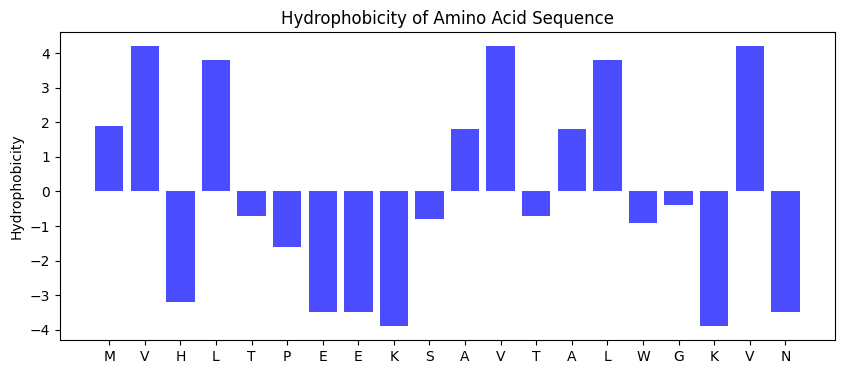

In [23]:
import matplotlib.pyplot as plt

# Hydrophobicity values for each amino acid (Kyte-Doolittle scale)
hydrophobicity = {
    'A': 1.8, 'C': 2.5, 'D': -3.5, 'E': -3.5, 'F': 2.8,
    'G': -0.4, 'H': -3.2, 'I': 4.5, 'K': -3.9, 'L': 3.8,
    'M': 1.9, 'N': -3.5, 'P': -1.6, 'Q': -3.5, 'R': -4.5,
    'S': -0.8, 'T': -0.7, 'V': 4.2, 'W': -0.9, 'Y': -1.3
}

def plot_hydrophobicity(sequence):
    values = [hydrophobicity[aa] for aa in sequence if aa in hydrophobicity]
    plt.figure(figsize=(10, 4))
    plt.bar(range(len(values)), values, color='b', alpha=0.7)
    plt.xticks(range(len(sequence)), sequence)
    plt.ylabel("Hydrophobicity")
    plt.title("Hydrophobicity of Amino Acid Sequence")
    plt.show()

# Example usage
plot_hydrophobicity(sequence[:20])

## 4. Visualization of Amino Acid Properties

We can also visualize other properties, such as polarity and charge, using similar techniques. Below is an example of visualizing amino acid **charge**.

### Charge Categories:

- **Positive:** K, R, H.
- **Negative:** D, E.
- **Neutral:** All other amino acids.

### Example: Visualizing Amino Acid Charge

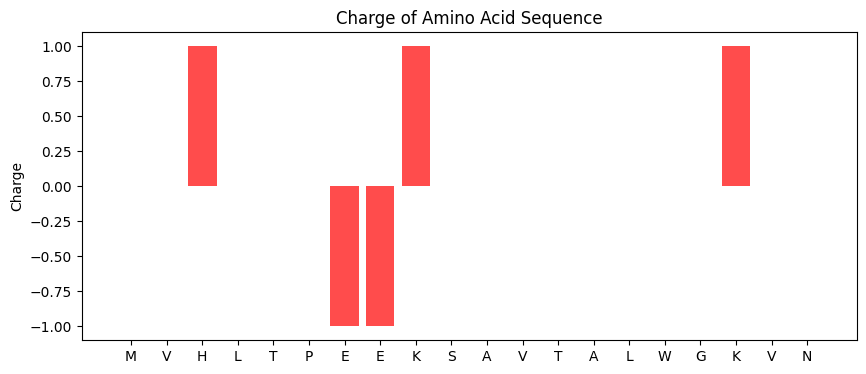

In [21]:
charge = {
    'A': 0, 'C': 0, 'D': -1, 'E': -1, 'F': 0, 'G': 0, 'H': 1, 'I': 0, 'K': 1,
    'L': 0, 'M': 0, 'N': 0, 'P': 0, 'Q': 0, 'R': 1, 'S': 0, 'T': 0, 'V': 0, 'W': 0, 'Y': 0
}

def plot_charge(sequence):
    values = [charge[aa] for aa in sequence if aa in charge]
    plt.figure(figsize=(10, 4))
    plt.bar(range(len(values)), values, color='r', alpha=0.7)
    plt.xticks(range(len(sequence)), sequence)
    plt.ylabel("Charge")
    plt.title("Charge of Amino Acid Sequence")
    plt.show()

# Example usage
plot_charge(sequence[:20])